<h1>Содержание <span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открываем-файлы-с-данными-и-изучаем-общую-информацию" data-toc-modified-id="Открываем-файлы-с-данными-и-изучаем-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открываем файлы с данными и изучаем общую информацию</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

**ПЛАН/ЗАДАЧА** 
Определить какой тариф для компании Мегалайн будет выгоднее

**Описание тарифов**

**Тариф «Смарт»**
- Ежемесячная плата, руб.	550	
- Включено: (мин/смс/Гб)	500/50/15	
- Сверх пакета, ру.: (мин/смс/Гб)	3/3/200	

**Тариф «Ультра»**
- Ежемесячная плата, руб.	1950	
- Включено: (мин/смс/Гб)	3000/1000/30	
- Сверх пакета, ру.: (мин/смс/Гб)	1/1/150

**Описание данных**

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

##  Открываем файлы с данными и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy
import seaborn as sns

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
for data in [calls, internet, messages, users, tariffs]: #классную подсказку дали, как посмотреть на все датасеты разом
    display(data.info())
    (print('*' * 70))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

**********************************************************************


**Исходя из данных делаем выводы:**

В таблице users: 
- столбцы reg_date - заменить типа данных на datetime
- Присутствуют пропуски в churn_date

В таблице internet:
- столбцы session_date - заменить типа данных на datetime

В таблице messages:
- message_date - заменить типа данных на datetime

В таблице calls:
- call_date - заменить типа данных на datetime

Так же необходимо округлить минуты и интернет трафик в большую сторону по правилам оператора.


## Подготовка данных

In [3]:
# переведем все нужные столбы разом в datetime 
datetime_columns = [calls['call_date'], internet['session_date'], messages['message_date'], users['churn_date'], users['reg_date']]
for index in datetime_columns:
    index = pd.to_datetime(index, format='%Y-%m-%d')

In [4]:
for data in [calls, internet, messages, users, tariffs]: #посмотрим на данные
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

In [5]:
for data in [calls, internet, messages, users, tariffs]: #посмотрим на данные
    display(data.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


- В таблице calls столбцы duration имеют пропущенные значения
- В таблице internet есть непонятный столбец, как мне кажется он не дает никаких данных, предлагаю его просто удалить
- Привести данные в нужный тип. Например user_id в messages в int
- Надо округлить значения в большую сторону, т.к тариф окргляет до минут и мб. Нулевые значения предлагаю заменить на 1.
- Интернет приведем в Гб для удобства дальнейшей обработки. Интренет предлагаю перевести в Гб для удобства обработки поделив значение mb_used на 1024

In [6]:
calls.loc[calls['duration'] == 0, 'duration'].value_counts() 

0.0    39613
Name: duration, dtype: int64

In [7]:
internet = internet.drop('Unnamed: 0', axis=1) #удаляем столбец
internet.dtypes #проверяем

id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

Приведем тип данных в столбце user_id к типу int

In [8]:
messages['user_id'] = messages['user_id'].astype('int')

In [9]:
messages.dtypes # проверяем

id              object
message_date    object
user_id          int64
dtype: object

Создадим переменную для тарифов придав им значения 0 и 1

In [10]:
users['tariff_id'] = users['tariff'].apply(lambda x: 1 if x == 'ultra' else 0)
users['tariff_id'].value_counts()

0    351
1    149
Name: tariff_id, dtype: int64

Округлим все значения в большую сторону и заменяем 0 на 1

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil).replace(0, 1)
#internet['mb_used'] = internet['mb_used'].apply(np.ceil).replace(0, 1)
internet['mb_used'] = np.ceil(internet['mb_used']) #тут сделал без apply

Переводим мб в Гб

In [12]:
internet['gb_used'] = internet['mb_used'] / 1024

In [13]:
for data in [calls, internet, messages, users, tariffs]: #посмотрим на измененные данные
    display(data.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.0,1000
1,1000_1,2018-08-17,1.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,1.0,1000
6,1000_6,2018-10-18,1.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,1.0,1000


,id,mb_used,session_date,user_id,gb_used
0,1000_0,113.0,2018-11-25,1000,0.110352
1,1000_1,1053.0,2018-09-07,1000,1.028320
2,1000_2,1198.0,2018-06-25,1000,1.169922
3,1000_3,551.0,2018-08-22,1000,0.538086
4,1000_4,303.0,2018-09-24,1000,0.295898
5,1000_5,400.0,2018-10-02,1000,0.390625
6,1000_6,541.0,2018-09-07,1000,0.528320
7,1000_7,416.0,2018-07-11,1000,0.406250
8,1000_8,506.0,2018-10-08,1000,0.494141
9,1000_9,346.0,2018-09-03,1000,0.337891


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,0
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,0
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,0
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,0
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Так как нам необъодимо узнать сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц - Добавим столбец с датами в таблицы с смс, звонками и траффиком. 

In [14]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [15]:
for data in [calls, internet, messages, users, tariffs]: #снова посмотрим на данные
    display(data.head(10))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.0,1000,7
1,1000_1,2018-08-17,1.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,1.0,1000,11
6,1000_6,2018-10-18,1.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,1.0,1000,8


,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,113.0,2018-11-25,1000,0.110352,11
1,1000_1,1053.0,2018-09-07,1000,1.028320,9
2,1000_2,1198.0,2018-06-25,1000,1.169922,6
3,1000_3,551.0,2018-08-22,1000,0.538086,8
4,1000_4,303.0,2018-09-24,1000,0.295898,9
5,1000_5,400.0,2018-10-02,1000,0.390625,10
6,1000_6,541.0,2018-09-07,1000,0.528320,9
7,1000_7,416.0,2018-07-11,1000,0.406250,7
8,1000_8,506.0,2018-10-08,1000,0.494141,10
9,1000_9,346.0,2018-09-03,1000,0.337891,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,0
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,0
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,0
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,0
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя 

Тут будем создавать сводные таблицы по минутам, смс и трафику, а затем обединять в одну.

Сводная таблица для сообщений

In [16]:
users_messages = messages.merge(users, on='user_id', how='outer')
messages_grouped = users_messages.pivot_table(values='id', 
                       index=['user_id', 'month',], 
                       aggfunc={'user_id': 'count'})
messages_grouped.columns = ['messages']
messages_grouped.head()

messages
user_id month          
1000    5.0          22
        6.0          60
        7.0          75
        8.0          81
        9.0          57

Сводная таблица для длительности звонка и их количества

In [17]:
users_calls = calls.merge(users, on='user_id', how='outer')
calls_grouped = users_calls.pivot_table(values=['duration'], 
                       index=['user_id', 'month'], 
                       aggfunc={'user_id': 'count', 'duration': 'sum'})
calls_grouped.columns = ['duration', 'calls']
calls_grouped.head()

duration  calls
user_id month                 
1000    5.0       164.0     22
        6.0       187.0     43
        7.0       346.0     47
        8.0       418.0     52
        9.0       478.0     58

Сводная таблица для значений использованого трафика

In [18]:
users_internet = internet.merge(users, on='user_id', how='outer')
internet_grouped = users_internet.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']
internet_grouped.head()

mb_used
user_id month         
1000    5.0     2256.0
        6.0    23257.0
        7.0    14016.0
        8.0    14070.0
        9.0    14581.0

Объединяем в одну сводную таблицу 

In [19]:
all_services = calls_grouped.merge(messages_grouped, how='outer', on=['user_id', 'month'])
all_services = all_services.merge(internet_grouped, how='outer', on=['user_id', 'month'])
all_services.reset_index(level=[0,1], inplace=True)
all_services.head()

,user_id,month,duration,calls,messages,mb_used
0,1000,5.0,164.0,22.0,22.0,2256.0
1,1000,6.0,187.0,43.0,60.0,23257.0
2,1000,7.0,346.0,47.0,75.0,14016.0
3,1000,8.0,418.0,52.0,81.0,14070.0
4,1000,9.0,478.0,58.0,57.0,14581.0


Добавляем тариф к объединенным данным

In [20]:
all_services = all_services.merge(users[['user_id', 'tariff_id']], on='user_id', how='left') 
all_services


,user_id,month,duration,calls,messages,mb_used,tariff_id
0,1000,5.0,164.0,22.0,22.0,2256.0,1
1,1000,6.0,187.0,43.0,60.0,23257.0,1
2,1000,7.0,346.0,47.0,75.0,14016.0,1
3,1000,8.0,418.0,52.0,81.0,14070.0,1
4,1000,9.0,478.0,58.0,57.0,14581.0,1
...,...,...,...,...,...,...,...
3209,1489,9.0,NaN,NaN,32.0,17232.0,0
3210,1489,10.0,NaN,NaN,21.0,19588.0,0
3211,1489,11.0,NaN,NaN,20.0,17516.0,0
3212,1489,12.0,NaN,NaN,35.0,17341.0,0


In [21]:
all_services.info() #так как видны пропущенные значения - посмотрим на даные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id      3214 non-null int64
month        3214 non-null float64
duration     3174 non-null float64
calls        3174 non-null float64
messages     2717 non-null float64
mb_used      3203 non-null float64
tariff_id    3214 non-null int64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


После формирования нового датафрейма появились пропуски. Некоторые пользователи пользовались не всеми услугами (кто-то только интернетом, а кто-то только звонками). Предлагаю заполнить пропуски нулями и посмотреть, что из этого выйдёт. 

In [22]:
empty_values= ['calls', 'duration', 'messages', 'mb_used']

for empty in empty_values:
    all_services[empty] = all_services[empty].fillna(0).astype('int64') #заполняем пропуски и переводим в int 

In [23]:
all_services.info() #проверяем заполнение 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id      3214 non-null int64
month        3214 non-null float64
duration     3214 non-null int64
calls        3214 non-null int64
messages     3214 non-null int64
mb_used      3214 non-null int64
tariff_id    3214 non-null int64
dtypes: float64(1), int64(6)
memory usage: 200.9 KB


Создадим функцию посчета выручки в зависимости от тарифа

In [24]:
def revenue(row):
    duration = row['duration']
    calls = row['calls']
    msg = row['messages']
    mb = row['mb_used']
    tariff = row['tariff_id']
    added = []
    
    if tariff == 0:
        added.append(duration - tariffs.loc[0, 'minutes_included'])
        added.append(mb - tariffs.loc[0, 'mb_per_month_included'])
        added.append(msg - tariffs.loc[0, 'messages_included'])
        x = [0 if x < 0 else x for x in added]
        
        return x[2] * tariffs.loc[0, 'rub_per_message'] + np.ceil(x[1] / 1024) * tariffs.loc[0, 'rub_per_gb'] + x[0] * tariffs.loc[0, 'rub_per_minute'] + tariffs.loc[0, 'rub_monthly_fee'] 
        
    else:
        added.append(duration - tariffs.loc[1, 'minutes_included'])
        added.append(mb - tariffs.loc[1, 'mb_per_month_included'])
        added.append(msg - tariffs.loc[1, 'messages_included'])
        x = [0 if x < 0 else x for x in added]
        return x[2] * tariffs.loc[1, 'rub_per_message'] +  np.ceil(x[1] / 1024) * tariffs.loc[1, 'rub_per_gb'] + x[0] * tariffs.loc[1, 'rub_per_minute'] + tariffs.loc[1, 'rub_monthly_fee']

    
all_services['revenue'] = all_services.apply(revenue, axis=1)
all_services.head(10)   

,user_id,month,duration,calls,messages,mb_used,tariff_id,revenue
0,1000,5.0,164,22,22,2256,1,1950.0
1,1000,6.0,187,43,60,23257,1,1950.0
2,1000,7.0,346,47,75,14016,1,1950.0
3,1000,8.0,418,52,81,14070,1,1950.0
4,1000,9.0,478,58,57,14581,1,1950.0
5,1000,10.0,363,57,73,14717,1,1950.0
6,1000,11.0,344,43,58,14768,1,1950.0
7,1000,12.0,341,46,70,9827,1,1950.0
8,1001,11.0,444,59,0,18452,0,1350.0
9,1001,12.0,430,63,0,14053,0,550.0


**ВЫВОДЫ**:
- В таблице internet удалили столбец из ненадобности 
- Привели данные в нужный тип. Например user_id в messages в int
- Создали переменную для тарифов под цифрами 0 и 1 для удобства агрегации 
- Интернет привели в Гб поделив на 1024
- Посчитали выручку в зависимости от тарифа

Посчитали для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя 


##  Анализ данных

Опишем поведение клиентов оператора, исходя из выборки и посчитаем:

- Сколько минут разговора,
- сколько сообщений,
- какой объём интернет-трафика
- требуется пользователям каждого тарифа в месяц.
- Посчитаем среднее количество, дисперсию и стандартное отклонение.


Создадим сводные таблицы и посмотрим на данные 

In [25]:
values = ['duration', 'messages', 'mb_used', 'revenue']

month_data = all_services.pivot_table(
    index=['tariff_id', 'month'],
    values=values
)

In [26]:
smart_per_month = month_data.loc[0]
smart_per_month

,duration,mb_used,messages,revenue
month,,,,
1.0,209.647059,8524.441176,18.235294,723.352941
2.0,306.310345,11611.396552,24.086207,835.051724
3.0,400.532468,15123.857143,31.857143,1178.571429
4.0,377.000000,13479.482143,30.741071,974.875000
5.0,398.404255,15825.198582,33.773050,1217.687943
6.0,406.701220,15814.768293,33.402439,1222.926829
7.0,419.288557,15763.512438,33.751244,1245.477612
8.0,433.191489,16632.174468,33.638298,1346.123404
9.0,440.080769,16324.526923,33.638462,1272.961538


In [27]:
ultra_per_month = month_data.loc[1]
ultra_per_month

,duration,mb_used,messages,revenue
month,,,,
1.0,440.888889,13153.555556,33.777778,1950.000000
2.0,304.666667,11786.958333,21.958333,1975.000000
3.0,503.081081,17551.972973,32.297297,2014.864865
4.0,470.072727,16843.800000,31.563636,2001.818182
5.0,524.865672,19381.194030,37.850746,2061.940299
6.0,492.428571,18942.238095,41.726190,2041.071429
7.0,560.296703,20514.648352,49.846154,2121.428571
8.0,524.570093,19594.065421,48.439252,2083.177570
9.0,553.643478,19222.208696,52.286957,2024.347826


Расчёт средних значений использования услуг в разрезе тарифов.

In [28]:
tariff_usage = month_data.pivot_table(
    index='tariff_id',
    values=values
)
tariff_usage

,duration,mb_used,messages,revenue
tariff_id,,,,
0,397.374228,15077.690651,31.413211,1198.029140
1,509.356551,18222.784561,43.714983,2047.737868


Выводы

- Клиенты с тарифом УЛЬТРА более активные пользователи, но клиенты тарифа СМАРТ тратят больше на дополнительные услуги. 
- По идее МЕГАЛАЙНУ тариф УЛЬТРА выгоднее. В СМАРТЕ меньшее количество прибыли.

Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [29]:
all_services['gb_used'] = all_services['mb_used'] / 1024

In [30]:
statistics = all_services.pivot_table(index=['tariff_id'], values=['duration', 'mb_used', 'messages', 'revenue'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std],
                             'messages': [np.median, np.var, np.std],
                             'revenue': [np.median, np.var, np.std, np.mean]})
statistics

duration                             mb_used                \
            median         std            var   median           std   
tariff_id                                                              
0            435.0  194.871174   37974.774628  16531.0   5877.576978   
1            532.0  325.738740  106105.726823  19324.0  10096.317202   

                        messages                              revenue          \
                    var   median        std          var         mean  median   
tariff_id                                                                       
0          3.454591e+07     28.0  28.227876   796.812958  1311.615074  1075.0   
1          1.019356e+08     38.0  47.804457  2285.266143  2071.065990  1950.0   

                                      
                  std            var  
tariff_id                             
0          830.044514  688973.895751  
1          378.802377  143491.240560

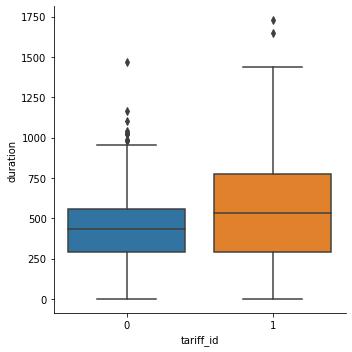

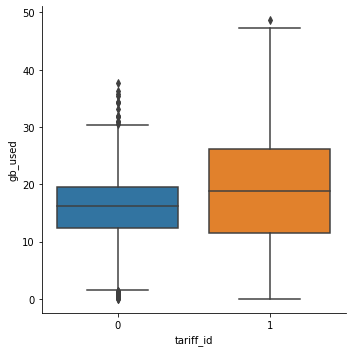

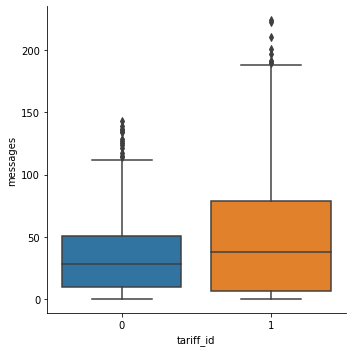

In [31]:
for column in ['duration', 'gb_used', 'messages']:    
    sns.catplot(x="tariff_id", y=column, kind="box", data=all_services, orient='v')

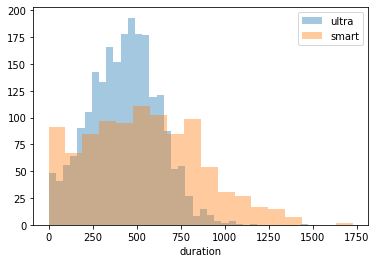

In [32]:
for tariff in range(2):
    sns.distplot(all_services.query('tariff_id == @tariff')['duration'], kde=False)
_ = plt.legend(['ultra', 'smart'])

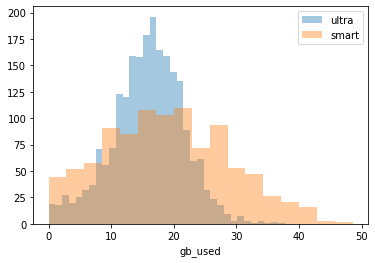

In [33]:
for tariff in range(2):
    sns.distplot(all_services.query('tariff_id == @tariff')['gb_used'], kde=False)
_ = plt.legend(['ultra', 'smart'])

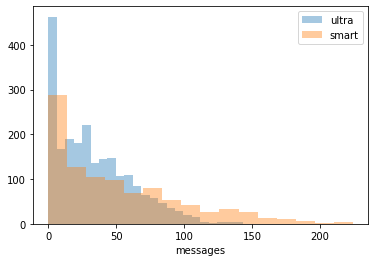

In [34]:
for tariff in range(2):
    sns.distplot(all_services.query('tariff_id == @tariff')['messages'], kde=False)
_ = plt.legend(['ultra', 'smart'])

Межквартильный размах у тарифа Ультра шире, что означает о больше неоднородности среди пользователе, чем у тарифа Смарт. Медианы так же влияют на значение более дорого тарифа. 

Скорее всего связано с тем, что когда ты покупаешь более дорогой тариф (где минут много), то о минутах и особо задумываться не надо. Когда же покупаешь более дешевый тариф, то приходится экономить и укладываться в рамки, чтобы не переплачивать.

## Проверка гипотез

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

- H0 - гипотеза о том, что средние наших выборок равны
- H1 гипотезой будет наша гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".


Критический уровень значимости заддадим 0.05( как в тренажере кхе).Вероятность правильности вывода тогда будет - 95% и больше.

In [35]:
from scipy import stats as st
alpha = 0.05
ultra = ultra_per_month['revenue']
smart = smart_per_month['revenue']
results = st.ttest_ind(smart, ultra, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 5.8329360042226996e-08
Отвергаем нулевую гипотезу


**ВЫВОД**

Значение p-value указывает на малую вероятность случайного совпадения средних по тарифам. Следовательно, мы отвергаем нулевую гипотезу и с уверенность в 95% можжно заявить, что средние значения выручки по тарифам не совпадут. 

Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- H0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
- H1 - средняя выручка пользователей из Москвы отличается средней выручке пользователей из других регионов.
Критический уровень значимости заддадим 0.05. Таким образом вероятность правильности вывода 95% и больше.

In [36]:
#создаем две таблицы. В одной будут все клиенты и Мск, во второй - все остальные
citys = all_services.merge(users.loc[: , ['user_id', 'city']], on='user_id')

moscow = citys.query('city == "Москва"')['revenue']
regions = citys.query('city != "Москва"')['revenue']

alpha = 0.05
results = st.ttest_ind(moscow, regions, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5612228736965572
Не получилось отвергнуть нулевую гипотезу


Значение p-value получилось высоким, значи нулевая гипотеза не может быть овтергнута. 

## Общий вывод

**Была проведена работа по подготовке данных:** 
- перевели данные в нужный тип
- избавились от ненужных столбцов 
- добавили необходимые столбцы для анализы 

**Проанализировал данные**:
- добавил сводные таблицы
- посчитал прибыль по месяцам по клиентам компании

**Проверил гипотезы**
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов: 


**Исходя из проверенных гипотез можем сделать вывод**:
- Для МЕГАЛАЙН выгоднее тариф УЛЬТРА, так как прибыль от него выше
- Для пользователя тариф СМАРТ выгоднее